In [4]:
import pandas as pd


In [2]:
###!!!only need to run this once
import urllib.request
url = 'https://raw.githubusercontent.com/PacktWorkshops/The-TensorFlow-Workshop/master/Chapter02/Datasets/Bias_correction_ucl.csv'
filename = 'Bias_correction_ucl.csv'
urllib.request.urlretrieve(url, filename)

('Bias_correction_ucl.csv', <http.client.HTTPMessage at 0x20e4c2c7610>)

In [5]:
df = pd.read_csv('Bias_correction_ucl.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [6]:
df.drop('Date', inplace=True, axis=1)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Text(0, 0.5, 'Frequency')

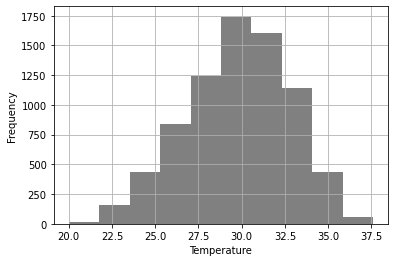

In [7]:
ax = df['Present_Tmax'].hist(color='gray')
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = scaler.fit_transform(df)
df2 = pd.DataFrame(df2, columns=df.columns)
df2.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,-1.664101,-0.359691,-0.756092,0.102018,0.381220,-0.522343,-0.215612,-0.127759,0.205963,-0.513740,...,-0.275149,-0.23947,-0.223364,1.189286,-0.005000,2.772243,1.115004,1.517935,-0.375626,-0.696383
1,-1.525426,0.717821,-0.673236,-0.306534,0.310075,0.080503,0.222762,-0.643856,-0.313314,-0.545897,...,-0.275149,-0.23947,-0.223364,1.189286,0.511177,-0.315157,-0.542158,1.229950,0.071972,-0.173760
2,-1.386750,0.616804,0.031047,-0.550133,-0.612000,0.162146,0.449022,-0.439462,-1.243225,-0.607490,...,-0.275149,-0.23947,-0.223364,0.653021,0.838510,-0.526218,-0.723133,1.216534,0.263799,0.389065
3,-1.248075,0.751493,0.072475,0.100934,1.127560,0.030941,-0.079487,-0.663016,0.095532,-0.580709,...,-0.275149,-0.23947,-0.223364,1.991696,0.385280,-0.297588,0.932424,1.201176,0.455627,0.549872
4,-1.109400,0.549460,-0.548950,-0.039904,0.247558,-0.169499,-0.011133,-0.624112,1.347841,-0.828251,...,-0.275149,-0.23947,-0.223364,0.118743,1.807917,-0.494322,-0.548433,1.207205,0.295771,-0.173760


Text(0, 0.5, 'Frequency')

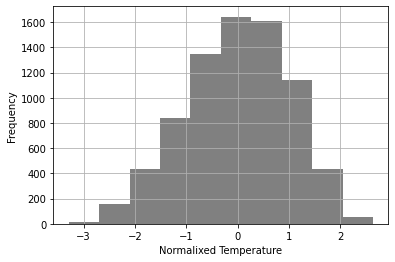

In [10]:
ax = df2['Present_Tmax'].hist(color='gray')
ax.set_xlabel("Normalised Temperature")
ax.set_ylabel("Frequency")

In [11]:
df = pd.read_csv('Bias_correction_ucl.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [12]:
year_dummies = pd.get_dummies(df['Date'].dt.year, prefix='year')
year_dummies

,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
7747,0,0,0,0,1
7748,0,0,0,0,1
7749,0,0,0,0,1
7750,0,0,0,0,0


In [13]:
month_dummies = pd.get_dummies(df['Date'].dt.month, prefix='month')
month_dummies

,month_6.0,month_7.0,month_8.0
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7747,0,0,1
7748,0,0,1
7749,0,0,1
7750,0,0,0


In [14]:
df =pd.concat([df, month_dummies, year_dummies], axis=1)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,Next_Tmax,Next_Tmin,month_6.0,month_7.0,month_8.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,29.1,21.2,1,0,0,1,0,0,0,0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,30.5,22.5,1,0,0,1,0,0,0,0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,31.1,23.9,1,0,0,1,0,0,0,0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,31.7,24.3,1,0,0,1,0,0,0,0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,31.2,22.5,1,0,0,1,0,0,0,0


In [15]:
df.drop('Date', axis=1, inplace=True)
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
month_6.0             uint8
month_7.0             uint8
month_8.0             uint8
year_2013.0           uint8
year_2014.0           uint8
year_2015.0           uint8
year_2016.0           uint8
year_2017.0           uint8
dtype: object